In [1]:
import numpy as np
import tifffile as tf
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from utils_image import getMeanTiff_equalsampling, UnrotateCropFrame, RegFrame, hist_match, compute_zpos_sp

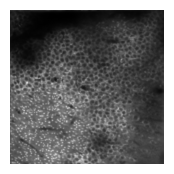

In [26]:
ops = np.load('/media/zilong/4TB Storage HDD/2PImaging/zstack/results/15122022_00002/suite2p/plane0/ops.npy', allow_pickle=True).item()
meanImg = ops['meanImg']
corr02 = ops['zcorr']

#show meanImg
plt.figure(figsize=(2,2))
plt.imshow(meanImg,cmap='gray')
plt.axis('off')

ops = np.load('/media/zilong/4TB Storage HDD/2PImaging/zstack/results/15122022_00003/suite2p/plane0/ops.npy', allow_pickle=True).item()
meanImg = ops['meanImg']
corr03 = ops['zcorr']


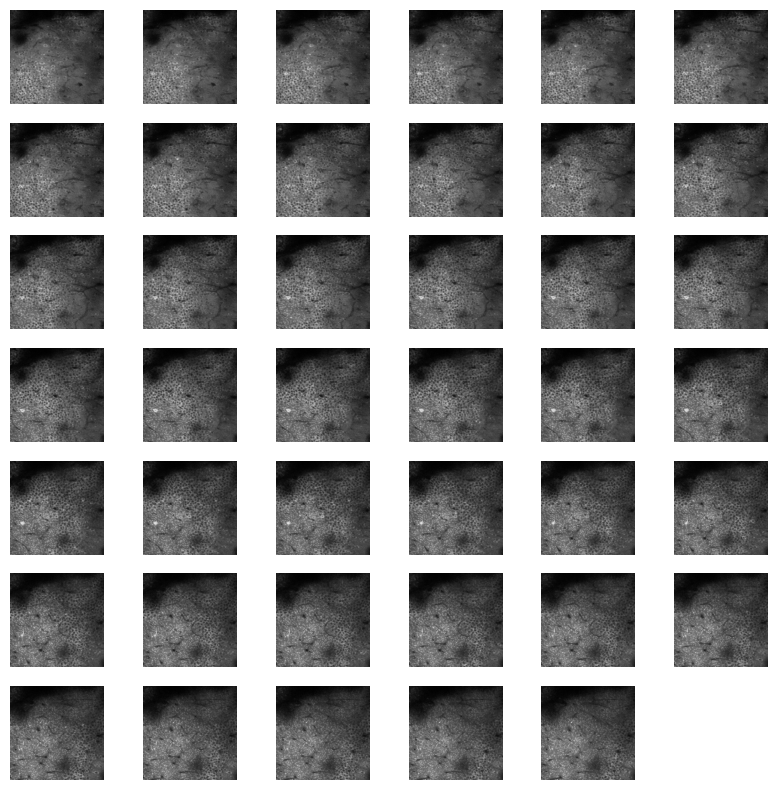

In [20]:
#read /media/zilong/4TB Storage HDD/2PImaging/zstack/results/zstacks.tif
zstacks = tf.imread('/media/zilong/4TB Storage HDD/2PImaging/zstack/results/zstacks.tif')
#show each of zstacks in each subplot
num = zstacks.shape[0]
rows = np.ceil(np.sqrt(num)).astype(int)
cols = np.ceil(num/rows).astype(int)
fig = plt.figure(figsize=(10,10))
for i in range(num):
    plt.subplot(rows,cols,i+1)
    #histogram matching
    zstacks[i,:,:] = hist_match(zstacks[i,:,:], meanImg)
    plt.imshow(zstacks[i,:,:],cmap='gray')
    plt.axis('off')
    


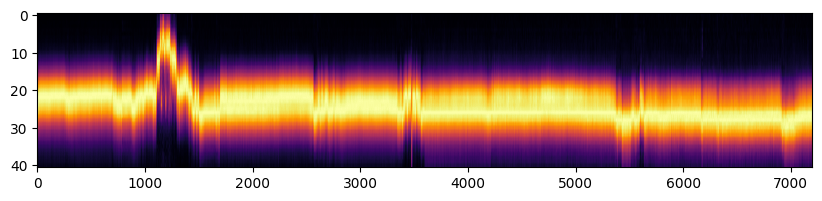

In [41]:
ops = np.load('/media/zilong/4TB Storage HDD/2PImaging/zstack/results/15122022_00002/suite2p/plane0/ops.npy', allow_pickle=True).item()
corr02 = ops['zcorr']

ops = np.load('/media/zilong/4TB Storage HDD/2PImaging/zstack/results/15122022_00003/suite2p/plane0/ops.npy', allow_pickle=True).item()
corr03 = ops['zcorr']

#concate zcorr02 and zcorr03
corrMatrix = np.concatenate((corr02,corr03),axis=1)
binsize = 10
#bin the corrMatrix every 10 stesp along axis 1
corrMatrix_bin = np.mean(corrMatrix.reshape(corrMatrix.shape[0],-1,binsize),axis=2)
#normalze corrMatrix_bin along axis 0 to 0-1
corrMatrix_bin = (corrMatrix_bin-np.min(corrMatrix_bin,axis=0))/(np.max(corrMatrix_bin,axis=0)-np.min(corrMatrix_bin,axis=0))
#plot corrMatrix
plt.figure(figsize=(10,2))
plt.imshow(corrMatrix_bin,cmap='inferno', aspect='auto')

In [2]:
import suite2p
import numpy as np
datafolder = '/media/zilong/4TB Storage HDD/2PImaging/zstack/results/15122022_00003/suite2p/plane0'

ops = np.load(datafolder+'/ops.npy', allow_pickle=True).item()
Ly = ops['Ly']
Lx = ops['Lx']
#load data.bin by suite2p.
databin = suite2p.io.BinaryFile(Ly, Lx, datafolder+'/data.bin', 'r')    

mean_img = databin.sampled_mean()

data = databin.data

In [5]:
#get first 500 frames using databin.__getitem__(i), with i=0,1,2,...,499
images = data[0:500]
#get mean image of first 500 frames
mean_img = np.mean(images,axis=0)
#save mean_img as a npy file under datafolder
np.save('/media/zilong/4TB Storage HDD/2PImaging/zstack/results//first500.npy',mean_img)

In [3]:
#get last 500 frames using databin.__getitem__(i), with i=0,1,2,...,499
images = data[-500:]
#get mean image of first 500 frames
mean_img = np.mean(images,axis=0)
#save mean_img as a npy file under datafolder
np.save('/media/zilong/4TB Storage HDD/2PImaging/zstack/results//last500.npy',mean_img)